# Consommation annuelle d’électricité et gaz par commune et par secteur d’activité

## Description 

Permet de visualiser l’évolution de 2011 à 2021 des consommations d'électricité et de gaz par secteur d'activité (résidentiel, tertiaire, industriel, agricole ou non affecté) et par commune.

Le jeu de données décrit aussi le nombre de points de livraison par maille géographique.

Les données sont ventilées sur le référentiel INSEE au 1er janvier 2021.

Ces données sont publiées dans le respect des règles relatives à la protection des Informations Commercialement Sensibles.

Une notice méthodologique est disponible en PJ.

## Source

* [dataset description](https://www.data.gouv.fr/fr/datasets/consommation-annuelle-delectricite-et-gaz-par-commune-et-par-secteur-dactivite/)
* [csv](https://www.data.gouv.fr/fr/datasets/r/8f4d90b3-0fdc-42ec-97ce-e5992b4200a6)

In [32]:
import pandas as pd

URL = "https://www.data.gouv.fr/fr/datasets/r/8f4d90b3-0fdc-42ec-97ce-e5992b4200a6"
FILE = "conso-elec-gaz-annuelle-par-secteur-dactivite-agregee-commune.csv"
# data = pd.read_csv(URL, delimiter=";", on_bad_lines="skip", low_memory=False
## Use  the local CSV instead of the one from data.gouv.fr
## This is used as a local cache
data =pd.read_csv(FILE, delimiter=";", on_bad_lines="skip", low_memory=False)


In [33]:
# print(data.info())

In [34]:
COBAN=[
    'MIOS',
    'MARCHEPRIME',
    'BIGANOS',
    'AUDENGE',
    'LANTON',
    'ANDERNOS-LES-BAINS',
    'ARES',
    'LEGE-CAP-FERRET',]

VAL_DE_L_EYRE = [
    'BELIN-BELIET',
    'LE BARP',
    'LUGOS',
    'SAINT-MAGNE',
    'SALLES',]

COBAS = [
    'ARCACHON',
    'GUJAN-MESTRAS',
    'LA TESTE-DE-BUCH',
    'LE TEICH']

COBAN_EPCI = 243301504
COBAS_EPCI = 243300563
VAL_DE_L_EYRE_EPCI = 243301405
SYBARVAL = COBAN +COBAS + VAL_DE_L_EYRE

print(SYBARVAL)
print([c.title() for c in SYBARVAL])

['MIOS', 'MARCHEPRIME', 'BIGANOS', 'AUDENGE', 'LANTON', 'ANDERNOS-LES-BAINS', 'ARES', 'LEGE-CAP-FERRET', 'ARCACHON', 'GUJAN-MESTRAS', 'LA TESTE-DE-BUCH', 'LE TEICH', 'BELIN-BELIET', 'LE BARP', 'LUGOS', 'SAINT-MAGNE', 'SALLES']
['Mios', 'Marcheprime', 'Biganos', 'Audenge', 'Lanton', 'Andernos-Les-Bains', 'Ares', 'Lege-Cap-Ferret', 'Arcachon', 'Gujan-Mestras', 'La Teste-De-Buch', 'Le Teich', 'Belin-Beliet', 'Le Barp', 'Lugos', 'Saint-Magne', 'Salles']


In [35]:
sybarval_df = data[data["libelle_commune"].isin([c.title() for c in SYBARVAL]) & data["code_departement"].str.contains("33")]
sybarval_df

operateur  annee      filiere       consoa  pdla  \
803          RTE   2014  Electricité     0.000000     0   
811          RTE   2014  Electricité     0.000000     0   
813          RTE   2014  Electricité     0.000000     0   
11754       GRDF   2011          Gaz     0.000000     0   
11770       GRDF   2011          Gaz     0.000000     0   
...          ...    ...          ...          ...   ...   
487157      GRDF   2019          Gaz   258.037000     1   
499027    Teréga   2018          Gaz     0.000000     0   
499052    Enedis   2020  Electricité     0.000000     0   
499104    Enedis   2020  Electricité  1683.712138   148   
499132    Enedis   2020  Electricité   330.027608     9   

        nombre_maille_secretisees_a  indquala         consoi  pdli  \
803                               0     0.000       0.000000     0   
811                               0     0.000       0.000000     0   
813                               0     0.000       0.000000     0   
11754                             0     0.000       0.000000     0   
11770                             0     0.000       0.000000     0   
...                             ...       ...            ...   ...   
487157                            0     1.000   12310.551730     3   
499027                            0     0.000  197880.210390     2   
499052                            0     0.000    7928.109776    91   
499104                            2     0.704    3843.851132   134   
499132                            0     0.229    6549.488158    81   

        nombre_maille_secretisees_i  ...  libelle_commune  code_epci  \
803                               0  ...          Le Barp  243301405   
811                               0  ...         Le Teich  243300563   
813                               0  ...      Marcheprime  243301504   
11754                             0  ...           Lanton  243301504   
11770                             0  ...         Le Teich  243300563   
...                             ...  ...              ...        ...   
487157                            0  ...             Mios  243301504   
499027                            0  ...          Biganos  243301504   
499052                            2  ...         Arcachon  243300563   
499104                            0  ...    Gujan-Mestras  243300563   
499132                            0  ...             Mios  243301504   

                                            libelle_epci  code_departement  \
803                                  CC du Val de l'Eyre                33   
811     CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS)                33   
813                         CA du Bassin d'Arcachon Nord                33   
11754                       CA du Bassin d'Arcachon Nord                33   
11770   CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS)                33   
...                                                  ...               ...   
487157                      CA du Bassin d'Arcachon Nord                33   
499027                      CA du Bassin d'Arcachon Nord                33   
499052  CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS)                33   
499104  CA Bassin d'Arcachon Sud-Pôle Atlantique (COBAS)                33   
499132                      CA du Bassin d'Arcachon Nord                33   

        libelle_departement  code_region      libelle_region  id_filiere  \
803                 Gironde           75  Nouvelle-Aquitaine         100   
811                 Gironde           75  Nouvelle-Aquitaine         100   
813                 Gironde           75  Nouvelle-Aquitaine         100   
11754               Gironde           75  Nouvelle-Aquitaine         200   
11770               Gironde           75  Nouvelle-Aquitaine         200   
...                     ...          ...                 ...         ...   
487157              Gironde           75  Nouvelle-Aquitaine         200   
499027              Gironde           75  Nouve

### Import and configure graphing libs

In [36]:
import seaborn as sns
sns.set_theme(style="whitegrid")

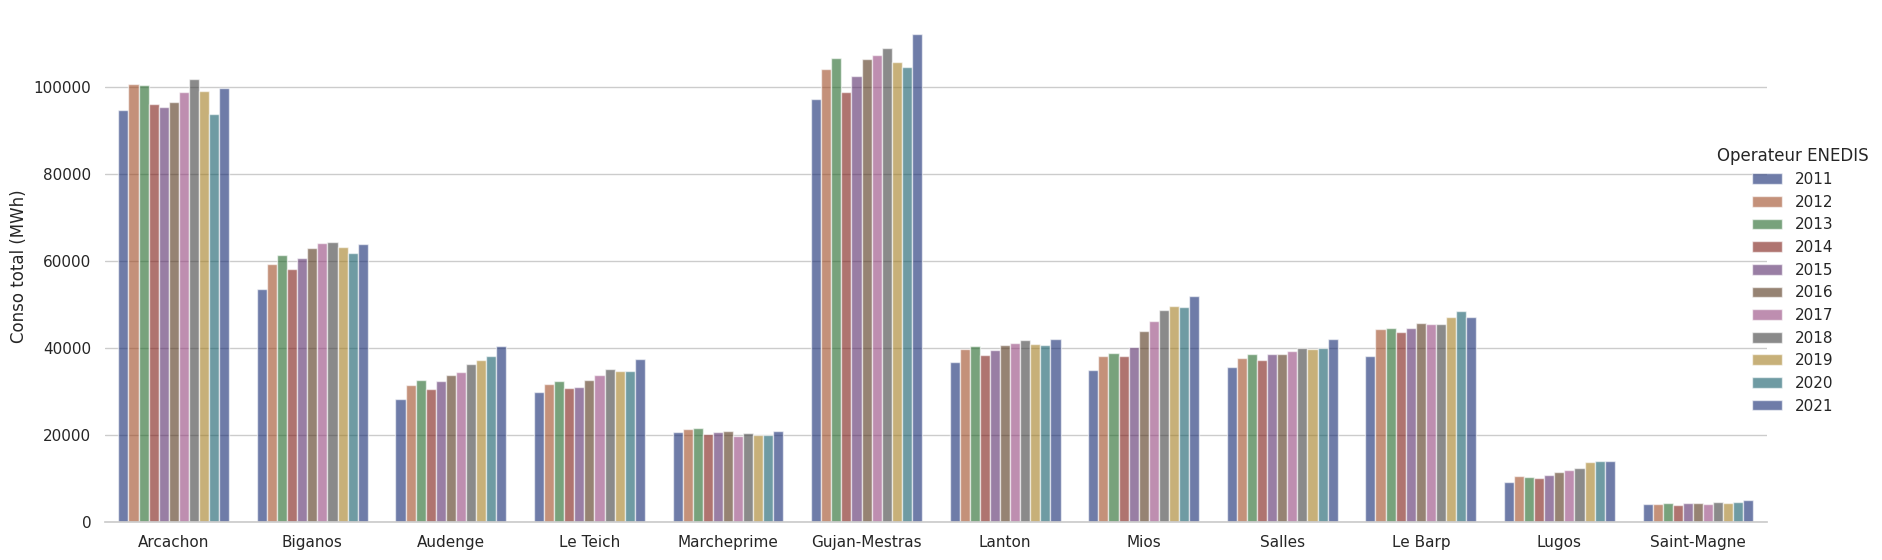

In [37]:
sybarval_df_enedis = sybarval_df[sybarval_df["operateur"] == "Enedis"]

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=sybarval_df_enedis, kind="bar",
    x="libelle_commune", y="consototale", hue="annee",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=3
)
g.despine(left=True)
g.set_axis_labels("", "Conso total (MWh)")
g.legend.set_title("Operateur ENEDIS")

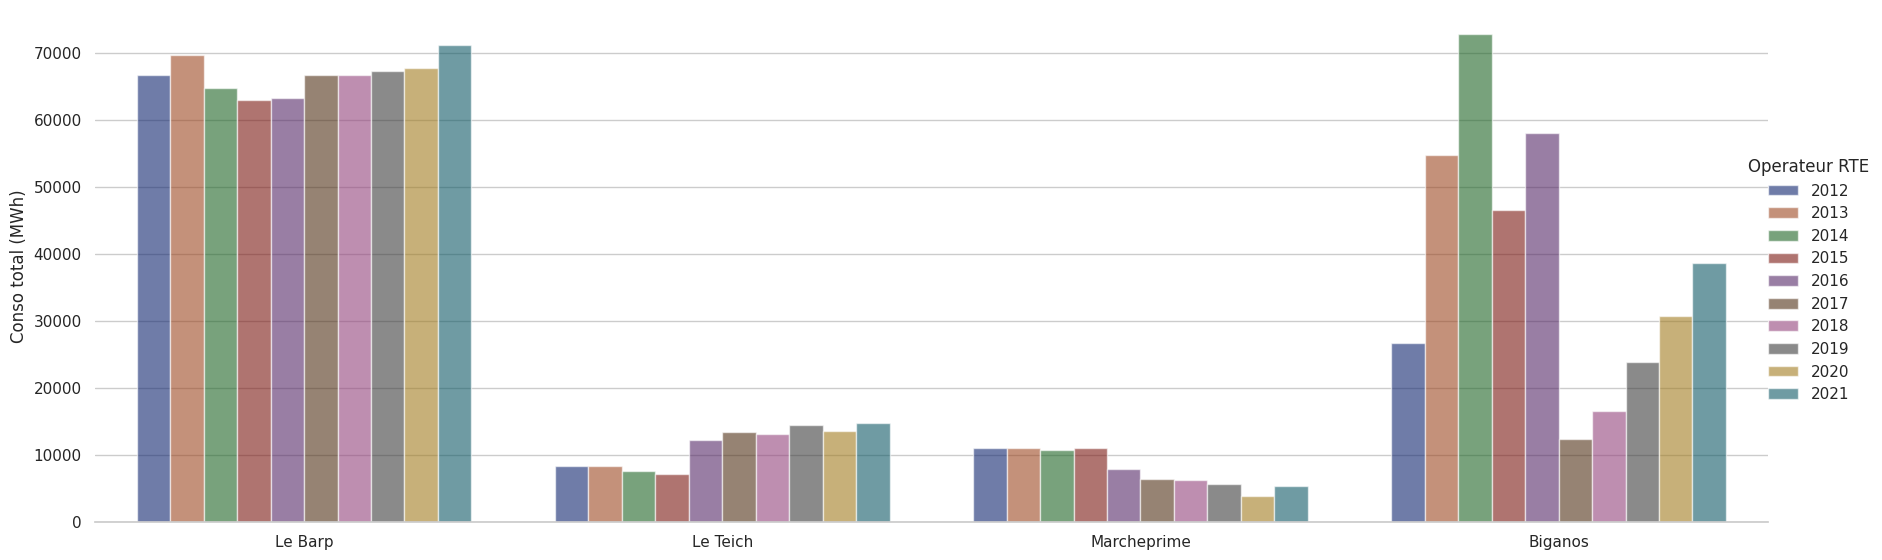

In [38]:


sybarval_df_rte = sybarval_df[sybarval_df["operateur"] == "RTE"]

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=sybarval_df_rte, kind="bar",
    x="libelle_commune", y="consototale", hue="annee",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=3
)
g.despine(left=True)
g.set_axis_labels("", "Conso total (MWh)")
g.legend.set_title("Operateur RTE")

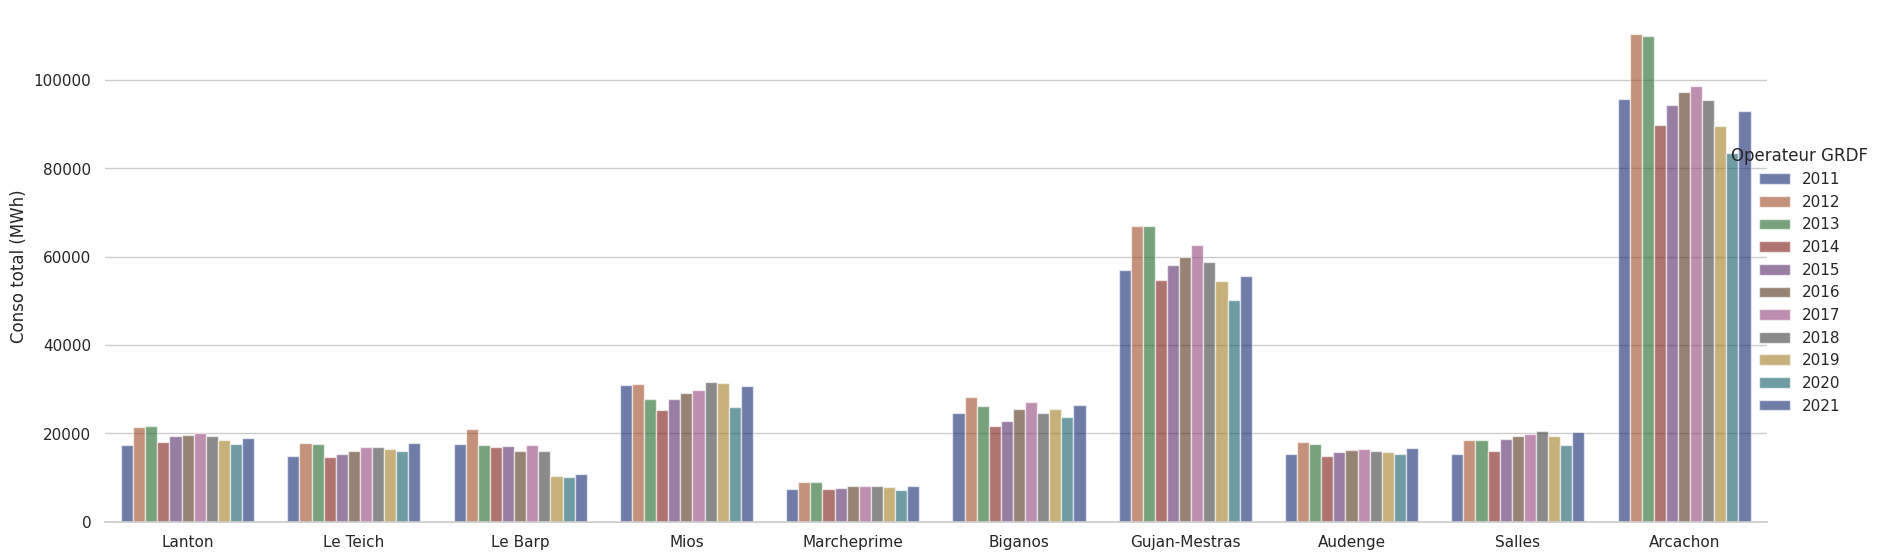

In [39]:
sybarval_df_rte = sybarval_df[sybarval_df["operateur"] == "GRDF"]

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=sybarval_df_rte, kind="bar",
    x="libelle_commune", y="consototale", hue="annee",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=3
)
g.despine(left=True)
g.set_axis_labels("", "Conso total (MWh)")
g.legend.set_title("Operateur GRDF")

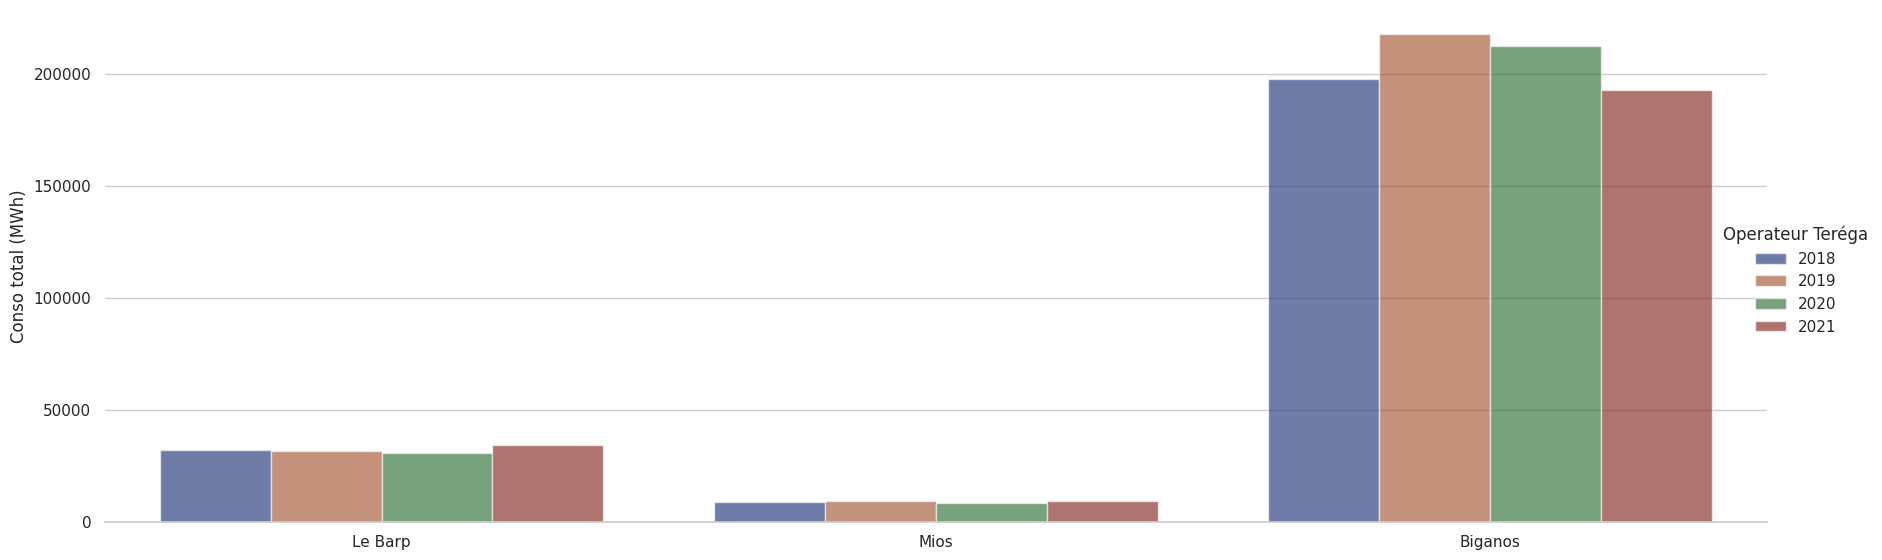

In [40]:
sybarval_df_rte = sybarval_df[sybarval_df["operateur"] == "Teréga"]

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=sybarval_df_rte, kind="bar",
    x="libelle_commune", y="consototale", hue="annee",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=3
)
g.despine(left=True)
g.set_axis_labels("", "Conso total (MWh)")
g.legend.set_title("Operateur Teréga")

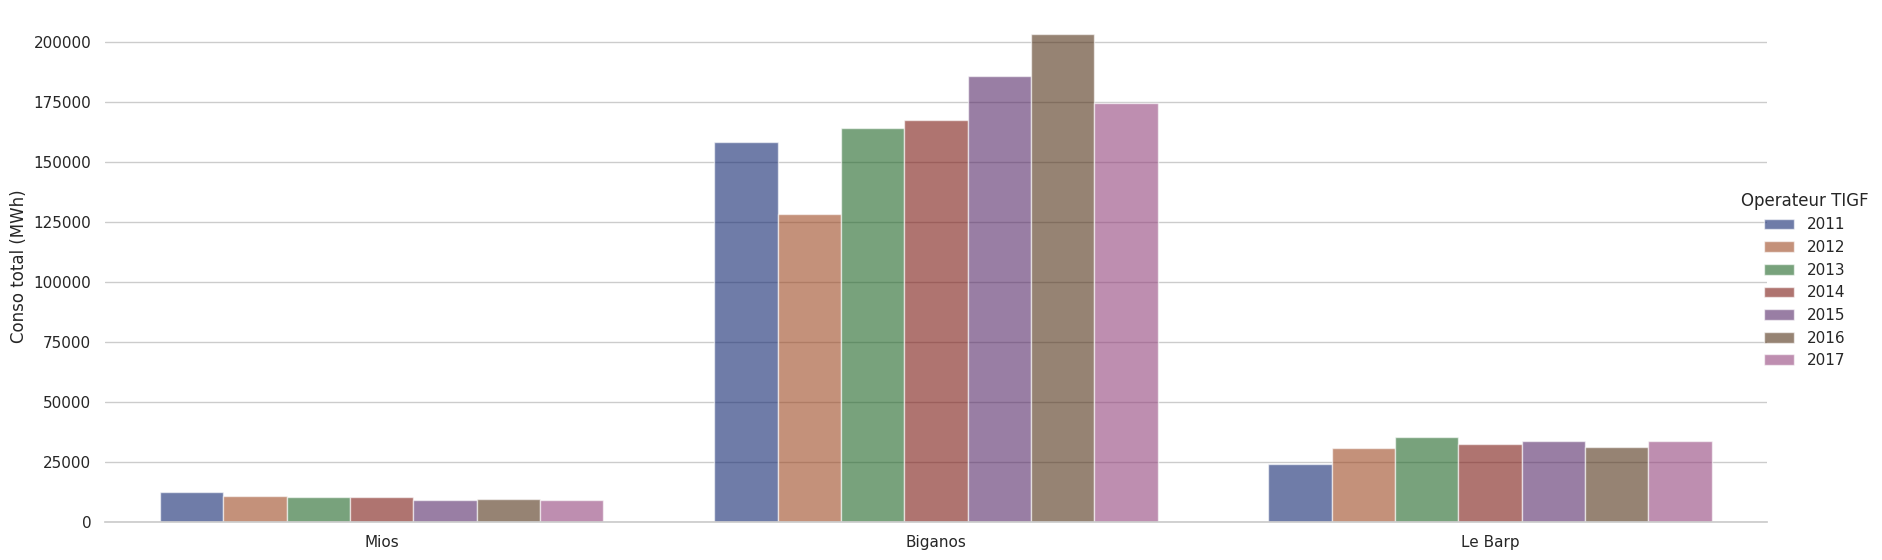

In [41]:
sybarval_df_rte = sybarval_df[sybarval_df["operateur"] == "TIGF"]

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=sybarval_df_rte, kind="bar",
    x="libelle_commune", y="consototale", hue="annee",
    errorbar="sd", palette="dark", alpha=.6, height=6,
    aspect=3
)
g.despine(left=True)
g.set_axis_labels("", "Conso total (MWh)")
g.legend.set_title("Operateur TIGF")